## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results

# Combine the data into a single dataset
mousecombined_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID",  how ="outer")

# Display the data table for preview
mousecombined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
    #number of records
mousecombinedcount = mousecombined_df["Mouse ID"].count()
print("There are", mousecombinedcount, "records in the dataframe")

    #number of unique records
mousecombineduniquecount = len(mousecombined_df["Mouse ID"].unique())
print("There are", mousecombineduniquecount, "unique mouse IDs records in the dataframe")

    #determine if blank fields
mousecombined_df.count()

There are 1893 records in the dataframe
There are 249 unique mouse IDs records in the dataframe


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
    #https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/#:~:text=To%20find%20%26%20select%20the%20duplicate,argument%20is%20'first').
        #DataFrame.duplicated(subset=None, keep='first')
mouseduplicates = mousecombined_df[['Mouse ID', 'Timepoint']]
mouseduplicates = mouseduplicates[mouseduplicates.duplicated(['Mouse ID', 'Timepoint'])]
mouseduplicates

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mousedduplicatesfull = mousecombined_df[mousecombined_df.duplicated(['Mouse ID', 'Timepoint'])]
mousedduplicatesfull


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    #------need to see if I can use index of duplicatse dataframe to drop rows rather than list all the roles
mousedduplicatesfull= mousecombined_df.drop(mousecombined_df.index[[909,911,913,915,917]])
mousedduplicatesfull

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
print("There are", len(mousedduplicatesfull), "records in the dataframe")

#number of unique records
mousecombineduniquecount = len(mousecombined_df["Mouse ID"].unique())
print("There are", mousecombineduniquecount, "unique mouse IDs records in the dataframe")



There are 1888 records in the dataframe
There are 249 unique mouse IDs records in the dataframe


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
    #for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mouseregimengroup = mousedduplicatesfull.groupby(["Drug Regimen"])
#mean
regimenmean = mouseregimengroup["Tumor Volume (mm3)"].mean()
regimenmean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#median
regimenmedian = mouseregimengroup["Tumor Volume (mm3)"].median()
regimenmedian

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#variance
regimenvar = mouseregimengroup["Tumor Volume (mm3)"].var()
regimenvar

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#standard deviation
regimenstd = mouseregimengroup["Tumor Volume (mm3)"].std()
regimenstd 

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#SEM
regimensem = mouseregimengroup["Tumor Volume (mm3)"].sem()
regimensem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [30]:
# create a dictonary 
#data = {"students": students, 
 #       "subject": subject, 
  #      "marks": marks} 

regimendict = {"regimenmean":regimenmean,
               "regimenmedian": regimenmedian,
               "regimenvar": regimenvar,
               "regimenstd": regimenstd,
               "regimensem": regimensem
}
regimendict

{'regimenmean': Drug Regimen
 Capomulin    40.675741
 Ceftamin     52.591172
 Infubinol    52.884795
 Ketapril     55.235638
 Naftisol     54.331565
 Placebo      54.033581
 Propriva     52.393463
 Ramicane     40.216745
 Stelasyn     54.233149
 Zoniferol    53.236507
 Name: Tumor Volume (mm3), dtype: float64,
 'regimenmedian': Drug Regimen
 Capomulin    41.557809
 Ceftamin     51.776157
 Infubinol    51.820584
 Ketapril     53.698743
 Naftisol     52.509285
 Placebo      52.288934
 Propriva     50.909965
 Ramicane     40.673236
 Stelasyn     52.431737
 Zoniferol    51.818479
 Name: Tumor Volume (mm3), dtype: float64,
 'regimenvar': Drug Regimen
 Capomulin    24.947764
 Ceftamin     39.290177
 Infubinol    43.128684
 Ketapril     68.553577
 Naftisol     66.173479
 Placebo      61.168083
 Propriva     43.138803
 Ramicane     23.486704
 Stelasyn     59.450562
 Zoniferol    48.533355
 Name: Tumor Volume (mm3), dtype: float64,
 'regimenstd': Drug Regimen
 Capomulin    4.994774
 Ceftamin   

In [38]:
#df = pd.concat(data, 
#               axis = 1)
regimensummary = pd.concat(regimendict, axis=1)
Regimen_Tumor_Volume_Summary = regimensummary.rename(columns={
    "regimenmean":"Mean Tumor Volume (mm3)",
    "regimenmedian":"Median Tumor Volume (mm3)",
    "regimenvar":"Variance Tumor Volume (mm3)",
    "regimenstd":"Standard Deviation Tumor Volume (mm3)",
    "regimensem":"SEM Tumor Volume (mm3)"
})
Regimen_Tumor_Volume_Summary

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

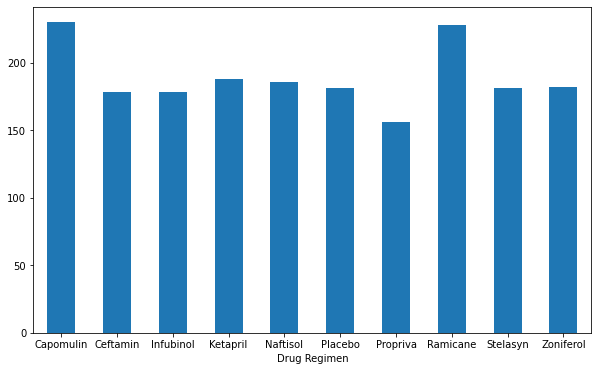

In [125]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study
    #using pandas. 
#X axis = Regimen
regimenmice = mouseregimengroup["Mouse ID"].count()

regimenY = regimenmice.values.tolist()
#print(regimenY)

#y azis = number of mice
regimenX = regimenmice.index.tolist()
#print(regimenX)

#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

regimenmice.plot.bar(figsize=(10,6), width=.5, rot=0)

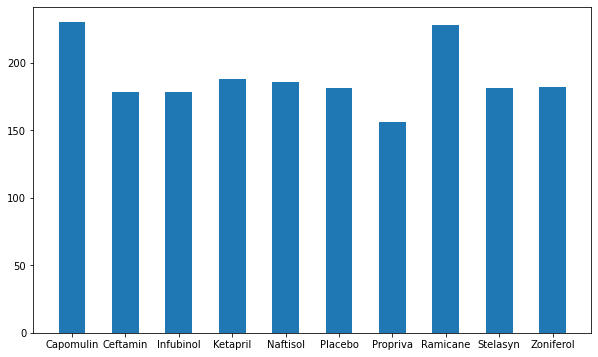

In [126]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study
    #using pyplot.

plt.figure(figsize=(10,6))
plt.bar(regimenX, regimenY, width=.5,)
plt.show()

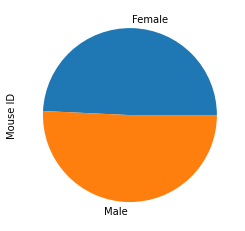

In [127]:

mousesexgroup = mousedduplicatesfull.groupby(["Sex"])
mousesexcount = mousesexgroup["Mouse ID"].count()


sexY = mousesexcount.values.tolist()
#print(sexY)

#y azis = number of mice
sexX = mousesexcount.index.tolist()
#print(sexX)

mousesexcount.plot.pie()

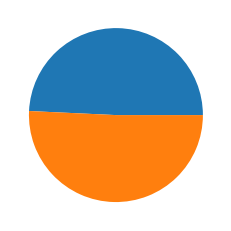

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sexY)
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
